In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [ ]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/preprocessing/Nifty_50.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('M').first()  #Monthly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-31,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-02-28,72.534309,129.505905,461.017334,224.228287,228.892075,874.448853,50.706177,40.127350,53.555435,...,220.991791,198.155762,444.054169,81.387192,200.754272,42.645218,123.912498,168.026260,947.186096,142.583527
2,2011-03-31,79.167389,129.508926,433.762726,228.274963,237.392761,937.185181,55.791252,42.826740,53.910622,...,230.473648,204.149445,434.151184,75.343185,214.425201,42.827469,132.059372,158.922440,908.912781,147.265991
3,2011-04-30,84.723770,131.559448,450.077759,227.170944,259.302917,1023.816101,63.170483,50.760136,55.898777,...,231.683350,203.737625,455.636627,83.332863,233.194565,42.297569,135.497879,180.222336,1056.681641,158.092194
4,2011-05-31,80.622169,134.076019,441.731628,247.228867,235.117905,1010.903870,62.429844,50.556591,58.435856,...,229.395950,212.888214,447.258636,82.794693,230.105453,41.490898,134.276825,183.001617,1011.799500,148.644196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,2658.821533,795.899414,4258.932617,3292.051270,730.054993,3855.355469,7230.277344,1506.516113,310.100677,...,514.940247,900.532959,3147.045898,796.709595,477.711121,104.828575,994.595703,2368.575928,6589.533203,427.035187
140,2022-09-30,3231.635498,832.205322,4259.680664,3412.858887,743.391418,3955.297852,7150.914062,1739.723145,312.912018,...,514.506042,857.415222,2987.633057,823.525269,465.449341,103.037048,997.722717,2613.532471,6602.324707,408.570190
141,2022-10-31,3155.723389,779.161926,4347.371582,3270.613037,722.013245,3410.999268,7141.454590,1645.732666,291.616791,...,501.433624,928.862427,2847.633789,764.147766,396.414490,95.241486,952.806763,2565.886719,6214.148438,392.693207
142,2022-11-30,3573.914307,836.178589,4492.924316,3133.030273,870.861328,3621.897461,7178.995117,1708.149902,287.414429,...,556.569641,1019.437500,3117.792480,761.102722,420.040863,98.001404,1014.779480,2746.052979,6789.867188,390.602814


In [64]:
data.dtypes

Date              object
ADANIENT.NS      float64
ADANIPORTS.NS    float64
APOLLOHOSP.NS    float64
ASIANPAINT.NS    float64
AXISBANK.NS      float64
BAJAJ-AUTO.NS    float64
BAJFINANCE.NS    float64
BAJAJFINSV.NS    float64
BPCL.NS          float64
BHARTIARTL.NS    float64
BRITANNIA.NS     float64
CIPLA.NS         float64
COALINDIA.NS     float64
DIVISLAB.NS      float64
DRREDDY.NS       float64
EICHERMOT.NS     float64
GRASIM.NS        float64
HCLTECH.NS       float64
HDFCBANK.NS      float64
HEROMOTOCO.NS    float64
HINDALCO.NS      float64
HINDUNILVR.NS    float64
ICICIBANK.NS     float64
ITC.NS           float64
INDUSINDBK.NS    float64
INFY.NS          float64
JSWSTEEL.NS      float64
KOTAKBANK.NS     float64
LT.NS            float64
M&M.NS           float64
MARUTI.NS        float64
NTPC.NS          float64
NESTLEIND.NS     float64
ONGC.NS          float64
POWERGRID.NS     float64
RELIANCE.NS      float64
SHRIRAMFIN.NS    float64
SBIN.NS          float64
SUNPHARMA.NS     float64


In [65]:
for name in stock_names:
    print(name)

ADANIENT.NS
ADANIPORTS.NS
APOLLOHOSP.NS
ASIANPAINT.NS
AXISBANK.NS
BAJAJ-AUTO.NS
BAJFINANCE.NS
BAJAJFINSV.NS
BPCL.NS
BHARTIARTL.NS
BRITANNIA.NS
CIPLA.NS
COALINDIA.NS
DIVISLAB.NS
DRREDDY.NS
EICHERMOT.NS
GRASIM.NS
HCLTECH.NS
HDFCBANK.NS
HEROMOTOCO.NS
HINDALCO.NS
HINDUNILVR.NS
ICICIBANK.NS
ITC.NS
INDUSINDBK.NS
INFY.NS
JSWSTEEL.NS
KOTAKBANK.NS
LT.NS
M&M.NS
MARUTI.NS
NTPC.NS
NESTLEIND.NS
ONGC.NS
POWERGRID.NS
RELIANCE.NS
SHRIRAMFIN.NS
SBIN.NS
SUNPHARMA.NS
TCS.NS
TATACONSUM.NS
TATAMOTORS.NS
TATASTEEL.NS
TECHM.NS
TITAN.NS
ULTRACEMCO.NS
WIPRO.NS


## Strat-1 MACD + RSI

In [67]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [68]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,2022-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2022-10-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,2022-11-30,0,0,0,0,1,-1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [69]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [70]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,34.663607,51.342524,63.599667,56.852864,47.430925,62.823867,59.561170,67.451635,55.248569,...,44.532612,63.381750,60.550423,64.235354,61.119438,38.901565,42.138460,62.338788,75.858585,49.481090
1,2012-04-30,31.482698,43.859475,68.700541,59.422362,47.520340,56.503334,64.011184,67.249271,58.274290,...,41.957077,66.969386,56.942047,58.060435,62.983772,40.083943,55.185282,65.848589,78.697301,53.961259
2,2012-05-31,30.028050,42.532014,67.437427,64.738418,45.270500,53.435838,67.453897,73.911781,54.151532,...,42.371468,70.146529,63.658310,60.124475,67.783931,39.180717,52.599884,66.007549,70.444514,44.806480
3,2012-06-30,28.113385,42.252577,70.340197,68.833096,39.809290,49.178833,62.261765,62.675510,58.108975,...,40.093477,62.465280,57.969110,50.887137,48.310950,33.871314,48.970077,56.395918,72.324980,44.289787
4,2012-07-31,27.875035,41.997886,63.834140,71.322918,44.042202,51.805428,66.253126,64.204900,63.008563,...,46.522109,70.687515,61.683272,57.239150,50.859068,40.528150,56.082704,57.599364,74.294801,45.054339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,83.404578,61.979580,57.726387,63.674391,53.721904,62.908359,62.259297,58.056190,45.753365,...,65.497659,66.082983,55.271350,63.657860,65.281024,56.385145,47.965203,62.253275,54.731548,46.095644
126,2022-09-30,87.315738,63.964478,57.733209,65.526353,54.744942,64.422498,61.454525,63.578958,46.312451,...,65.424835,61.526781,50.822471,65.321122,63.366606,55.565575,48.092346,66.424646,54.837595,44.427877
127,2022-10-31,84.474389,59.109188,58.577107,61.547485,52.732557,51.977906,61.352728,60.141854,42.720766,...,63.148397,65.741734,47.227214,58.893699,53.800490,52.022187,46.340812,64.921816,50.937861,42.987677
128,2022-11-30,86.986672,62.411978,60.004528,57.886247,62.945766,55.560004,61.624406,61.625491,42.028081,...,68.177711,70.199041,53.991068,58.575385,56.235552,53.161004,49.095566,67.881029,55.942187,42.790995


In [71]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-31,47.456532,137.573227,549.450989,286.860901,214.776230,1281.127686,71.013489,61.910526,62.056656,...,191.493057,253.606613,477.968262,104.154602,255.928055,31.875605,117.143425,214.990906,1354.889282,143.137146
1,2012-04-30,39.865295,121.319275,589.651245,297.220978,215.130188,1195.199463,76.656906,61.789082,64.741058,...,183.867844,264.228363,468.033325,97.399536,265.123108,32.492043,140.719421,228.096069,1429.621582,149.302628
2,2012-05-31,36.144112,118.087219,584.661865,321.574951,205.526825,1149.671997,81.694191,71.388519,61.934216,...,184.748184,274.942139,496.642700,100.777069,291.654572,31.810171,135.947281,228.706696,1360.483398,136.112503
3,2012-06-30,31.050920,117.431427,609.323608,344.253143,179.688110,1082.265015,77.616608,63.533115,65.414513,...,178.242645,262.223785,479.927795,89.209038,215.077286,27.405582,128.936325,207.945114,1402.081177,135.270279
4,2012-07-31,30.416700,116.869347,583.141174,359.998016,194.733078,1125.084717,83.434517,65.583191,70.373581,...,191.749817,292.476044,496.762115,99.594940,227.911987,30.783926,144.215088,211.702850,1448.603760,136.213959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,2658.821533,795.899414,4258.932617,3292.051270,730.054993,3855.355469,7230.277344,1506.516113,310.100677,...,514.940247,900.532959,3147.045898,796.709595,477.711121,104.828575,994.595703,2368.575928,6589.533203,427.035187
126,2022-09-30,3231.635498,832.205322,4259.680664,3412.858887,743.391418,3955.297852,7150.914062,1739.723145,312.912018,...,514.506042,857.415222,2987.633057,823.525269,465.449341,103.037048,997.722717,2613.532471,6602.324707,408.570190
127,2022-10-31,3155.723389,779.161926,4347.371582,3270.613037,722.013245,3410.999268,7141.454590,1645.732666,291.616791,...,501.433624,928.862427,2847.633789,764.147766,396.414490,95.241486,952.806763,2565.886719,6214.148438,392.693207
128,2022-11-30,3573.914307,836.178589,4492.924316,3133.030273,870.861328,3621.897461,7178.995117,1708.149902,287.414429,...,556.569641,1019.437500,3117.792480,761.102722,420.040863,98.001404,1014.779480,2746.052979,6789.867188,390.602814


In [72]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [73]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

In [74]:
intrade

[[129, 28, 1.3608768761508188, 45]]

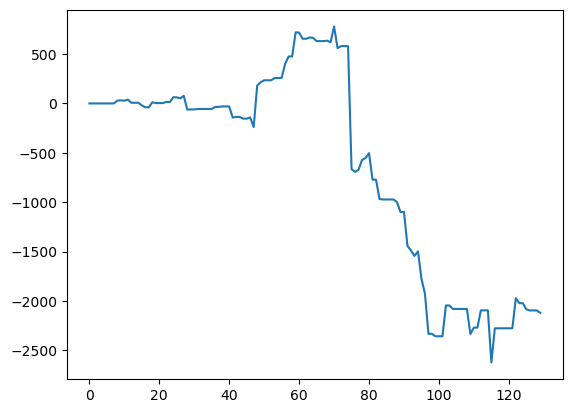

In [75]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

## Strat-2 RSI

In [76]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [77]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

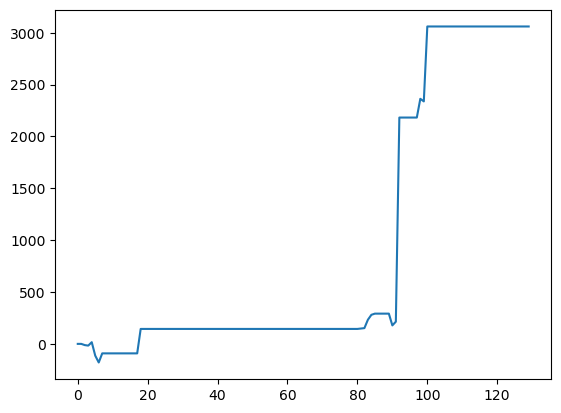

In [78]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()